In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

円弧の式は

$x^2 +y^2 = 4$

$\Rightarrow$ $y = \pm\sqrt{4-x^2}$

右上の扇形なので$y = \sqrt{4-x^2}$

In [2]:
def get_arc(n): # 後々のために関数化
    x = np.linspace(0, 2, n)
    y = np.sqrt(4 - x**2)
    return x, y
n_pi = 1000 # 円弧を描くときの点数
x_pi, y_pi = get_arc(n_pi)

プロットする

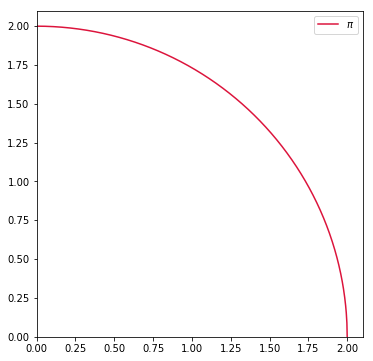

In [3]:
plt.figure(figsize=(6,6))
plt.plot(x_pi, y_pi, label="$\pi$", c="#dc143c")
plt.axis("scaled")
plt.xlim(0,2.1)
plt.ylim(0, 2.1)
plt.legend()

## 階段状の線分の計算と描画

円弧上の点を階段状につなぐ線分を計算する。点は等間隔になっている必要はないが、面倒なのでxを等間隔に区切る。
円弧上の点を何点とるか選べるように関数化する。

この線分は$(x_1,y_1), (x_2, y_1), (x_2,y_2),...,$ とx,yが交互に増えていくので`np.repeat`を使って下記のようにかける。

（`np.r_[]`は`np.ndarray`を`axis=0`の方向に結合する）

In [4]:
def get_step(n):
    x_step = np.linspace(0, 2, n)
    y_step = np.sqrt(4 - x_step**2)
    x_step = np.r_[x_step[0], np.repeat(x_step[1:], 2)]
    y_step = np.r_[np.repeat(y_step[:-1], 2), y_step[[-1]]]
    return x_step, y_step

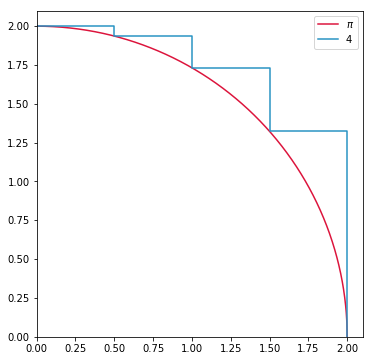

In [5]:
n_step = 5 # 円弧上の点数

plt.figure(figsize=(6,6))
plt.plot(x_pi, y_pi, label="$\pi$", c="#dc143c")
plt.plot(*get_step(n_step),label="4", c='#2792c3')
plt.axis("scaled")
plt.xlim(0,2.1)
plt.ylim(0, 2.1)
plt.legend()

点の数を増やしてみる

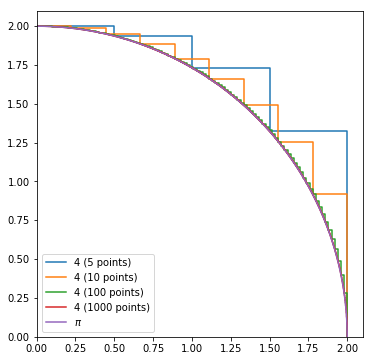

In [6]:
plt.figure(figsize=(6,6))
fig=plt.gcf()
for n_step in [5,10,100,1000]:
    plt.plot(*get_step(n_step),label=f"4 ({n_step} points)")

plt.plot(x_pi, y_pi, label="$\pi$")    
plt.axis("scaled")
plt.xlim(0,2.1)
plt.ylim(0, 2.1)
plt.legend()

1000点までいくと、円弧のグラフとほとんど重なっているように見える

拡大してみる

In [7]:
ax.set_xlim(1.5,1.55)
ax.set_ylim(1.26, 1.32)
fig

NameError: name 'ax' is not defined

明らかにくっついていないことがわかる

## 長さの計算

隣り合う点同士を直線で結んだ線分の場が差の合計値を計算してみる

(長さ) $=\sum_{i=2}^N \sqrt{(x_{i-1} - x_i)^2 + (y_{i-1} - y_i)^2}$

### 円弧の長さ

点数を変えて$\pi$に近づくことを検証する

In [ ]:
def calc_distance(points):
    return np.sum(np.sqrt(np.sum((points[:-1]-points[1:])**2,1)))

for n_pi in [10,100,1000,10000]:
    points_pi = np.c_[get_arc(n_pi)]
    print(f"arc ({n_pi} points): {calc_distance(points_pi)}")

In [ ]:
np.pi

10000点あれば小数点以下5桁くらいはあっている

### 階段線分の長さ

同じく点の数を変えて計算する

In [ ]:
for n__step in [10,100,1000,10000]:
    points_step =np.c_[get_step(n_step)]
    print(f"step ({n_step} points): {calc_distance(points_step)}")

点の数を変えても常に4であることがわかる

## おまけ

解析的に円弧の長さを計算する

In [ ]:
import sympy

In [ ]:
x=sympy.var("x")
sympy.integrate(sympy.sqrt(4-x**2),(x,0,2))